## TP4

#### Alumno: Emmanuel Cardozo

▪ Para las imágenes suministradas
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

In [222]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [223]:
def load_image(path, filename, grayscale=False):
    flags = {"flags": cv.IMREAD_GRAYSCALE} if grayscale else {}
    img = cv.imread(os.path.join(path, filename), **flags)
    if grayscale:
        return img
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [224]:
def load_gray_image(path, filename):
    img = cv.imread(os.path.join(path, filename))
    return cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [225]:
images_path = R"C:\Users\Emmanuel\Desktop\Esp. en IA\2_VPC1\TP4/assets"

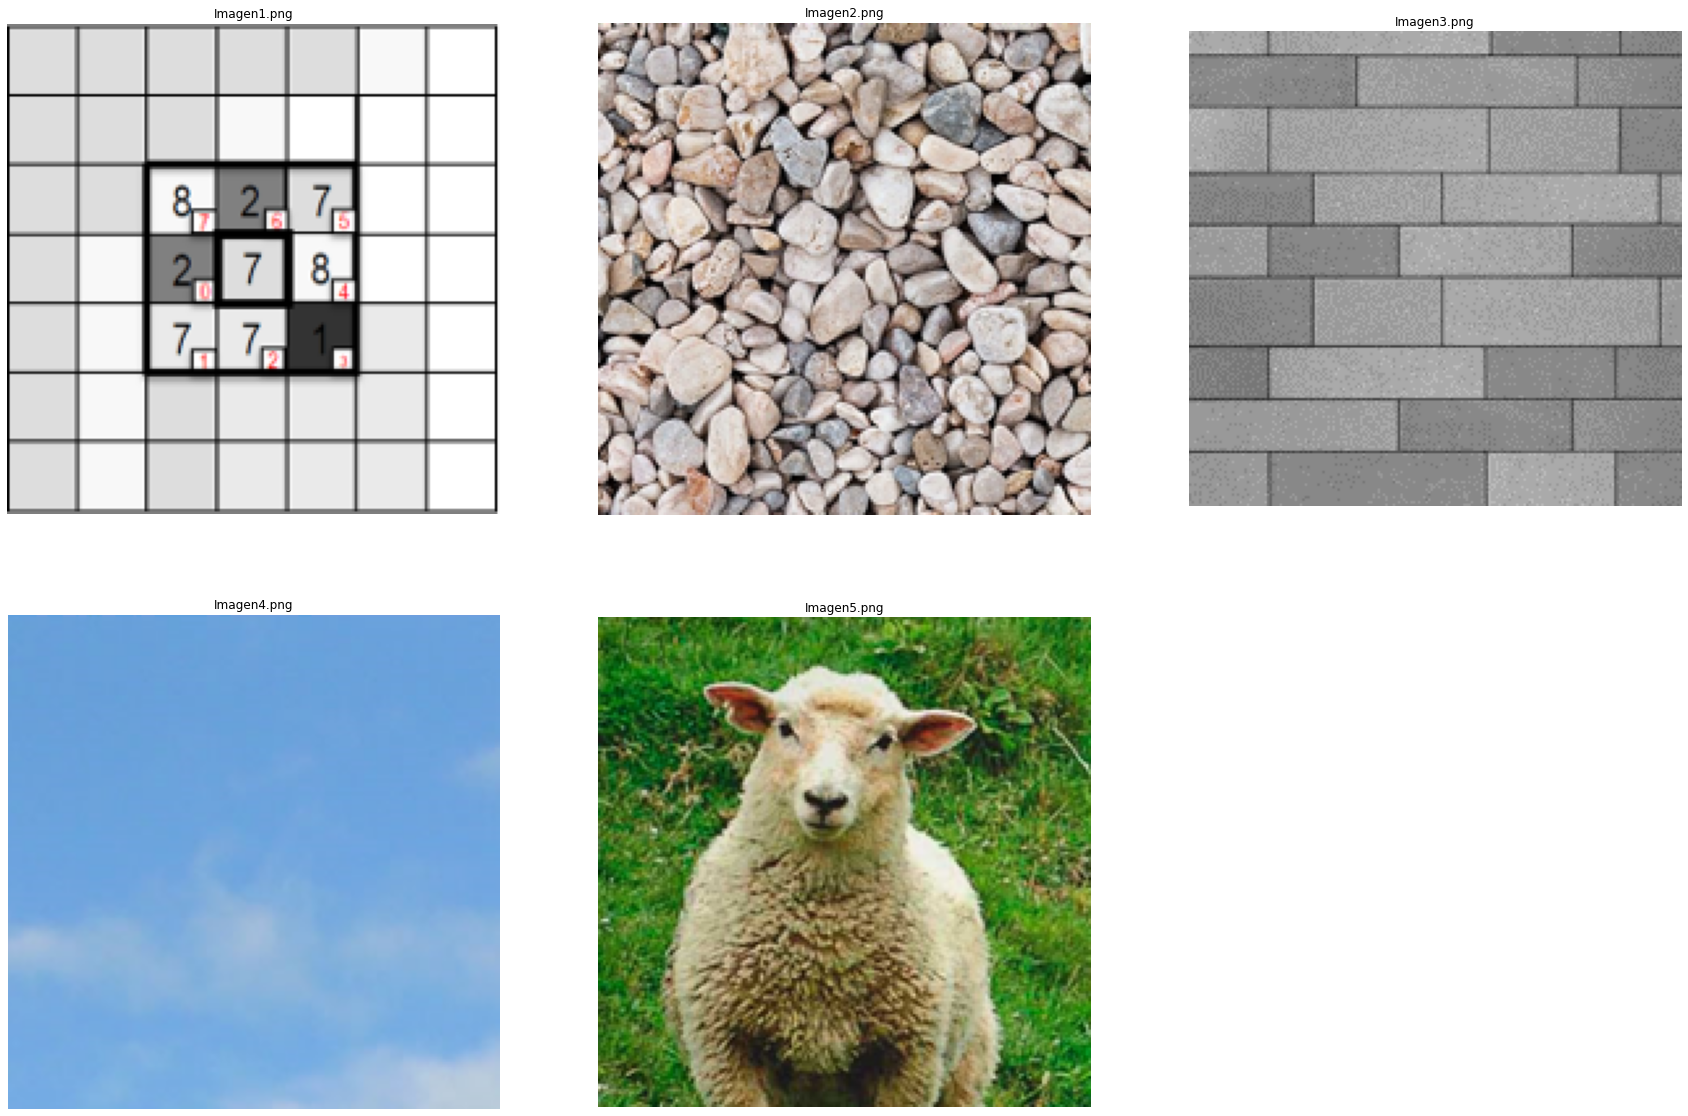

In [226]:
filenames = os.listdir(images_path)
images = [load_image(images_path, filename) for filename in filenames]
gray_images = [load_gray_image(images_path, filename) for filename in filenames]

_, axes = plt.subplots(2, 3, figsize=(30, 20))
for i in range(2):
    for j in range(3):
        idx = i * 3 + j
        if idx < 5:
            axes[i][j].imshow(images[idx])
            axes[i][j].title.set_text(filenames[idx])
        axes[i][j].axis("off")

#### Imágenes en escalas de grises 

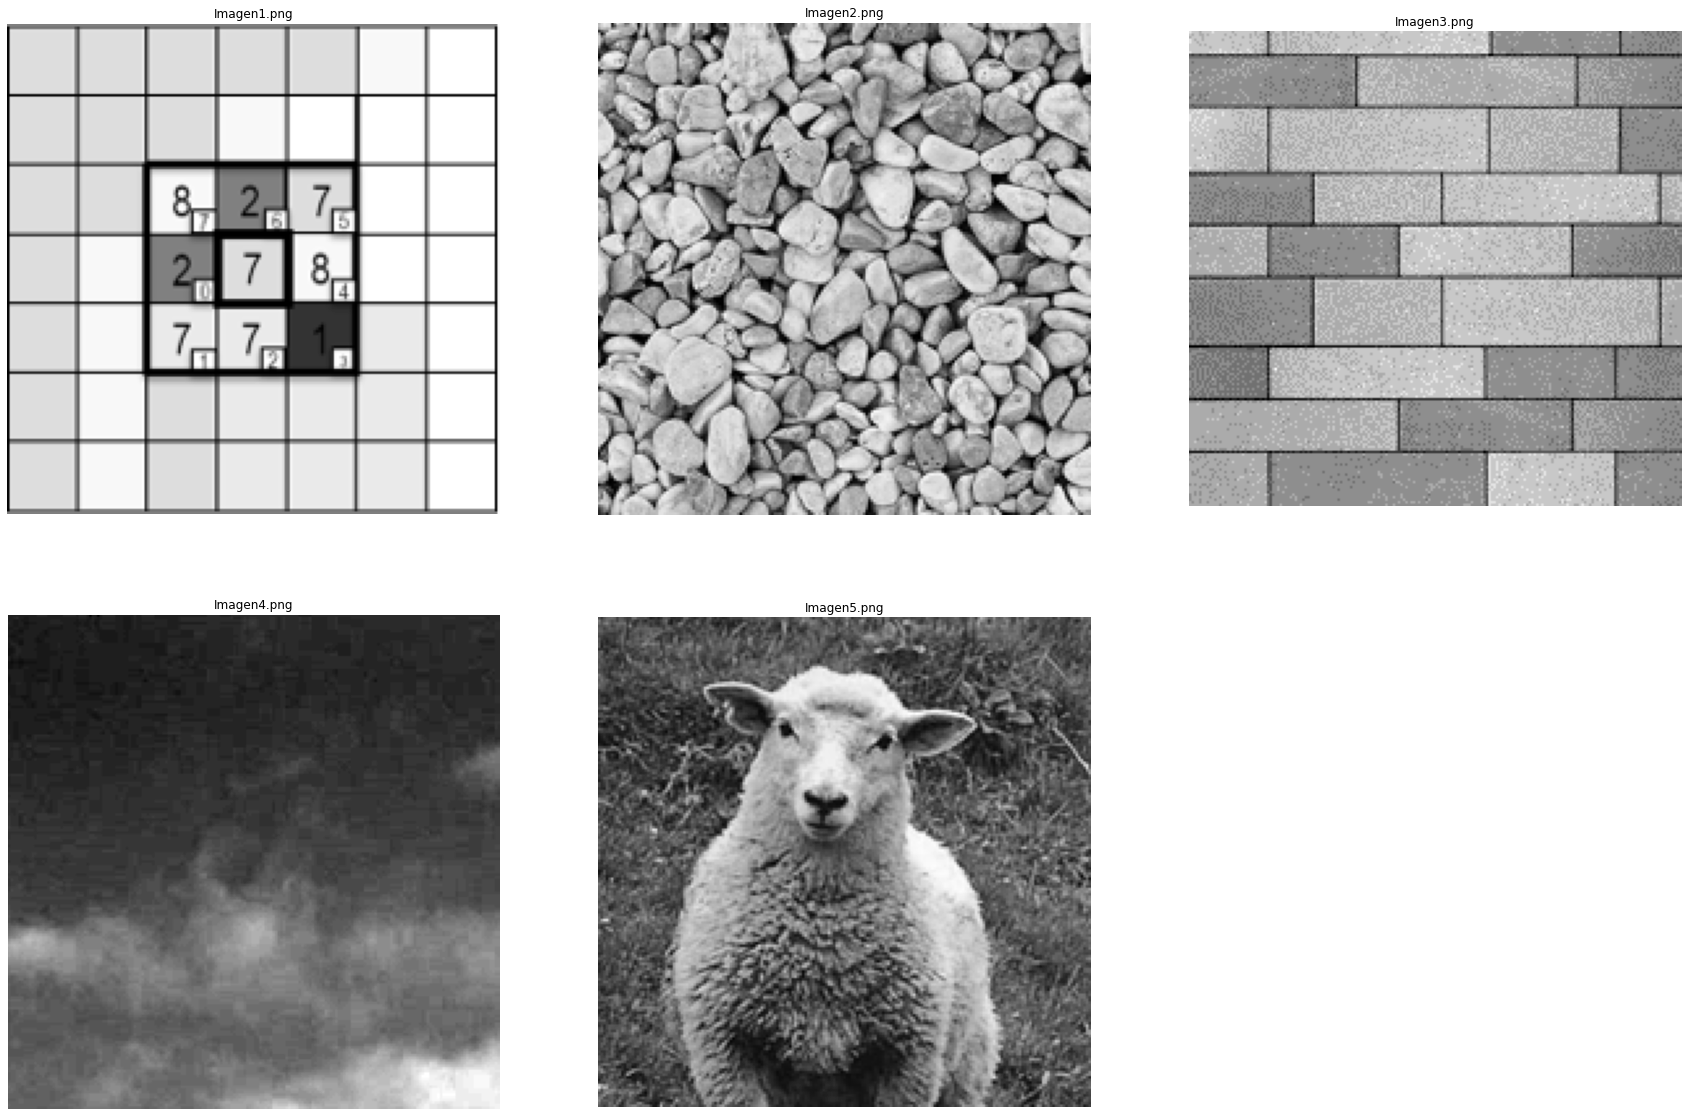

In [231]:
_, axes = plt.subplots(2, 3, figsize=(30, 20))
for i in range(2):
    for j in range(3):
        idx = i * 3 + j
        if idx < 5:
            axes[i][j].imshow(gray_images[idx], cmap ="gray")
            axes[i][j].title.set_text(filenames[idx])
        axes[i][j].axis("off")

#### Punto 1:

In [227]:
def calc_lbp(image,i,j):
    binary_patterns=[]
    borders = [image[i-1,j-1:j+2], 
             image[i,j+1:j+2], 
             image[i+1,j-1:j+2][::-1], 
             image[i,j-1:j]]
    borders = np.concatenate(borders)
    for num in borders:
        if num > image[i,j]:
            binary_patterns.append(1)
        else:
            binary_patterns.append(0)
    return binary_patterns

In [228]:
def lbp(image):
    lbp_array = np.zeros(image.shape, np.uint8)
    w = image.shape[0]
    h = image.shape[1]
    for i in range(1, w-1):
        for j in range(1, h-1):
            binary_pattern = calc_lbp(image,i,j)
            bit_num = 0
            result = 0
            for s in binary_pattern:
                result += s << bit_num
                bit_num += 1
            lbp_array[i,j] = result
    return lbp_array

#### Punto 2:

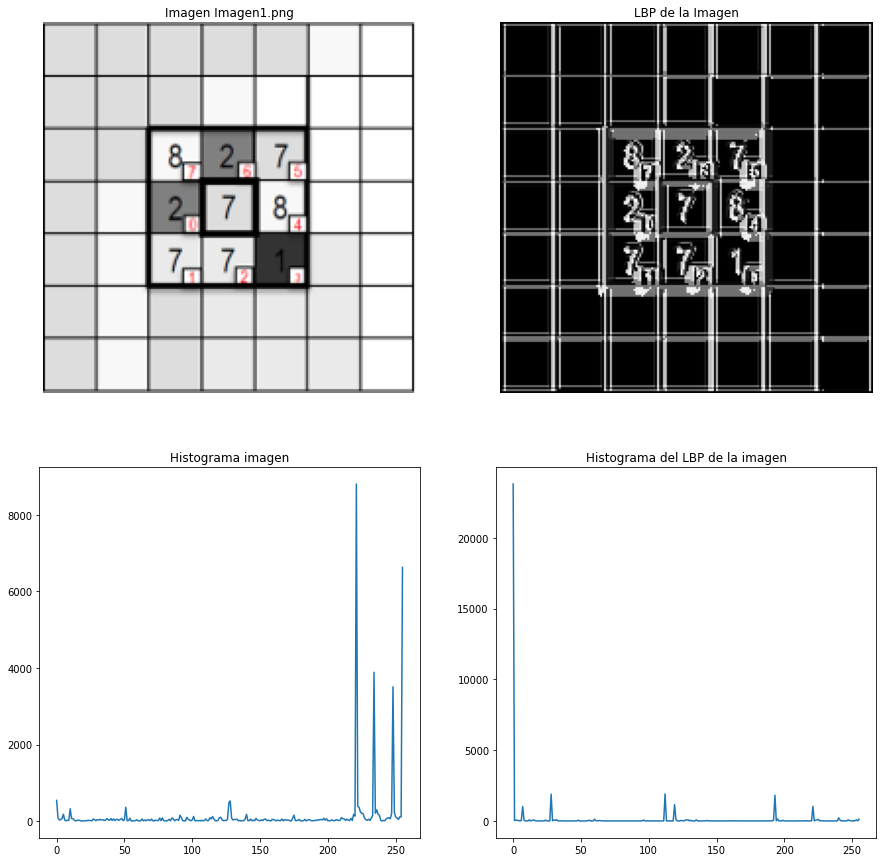

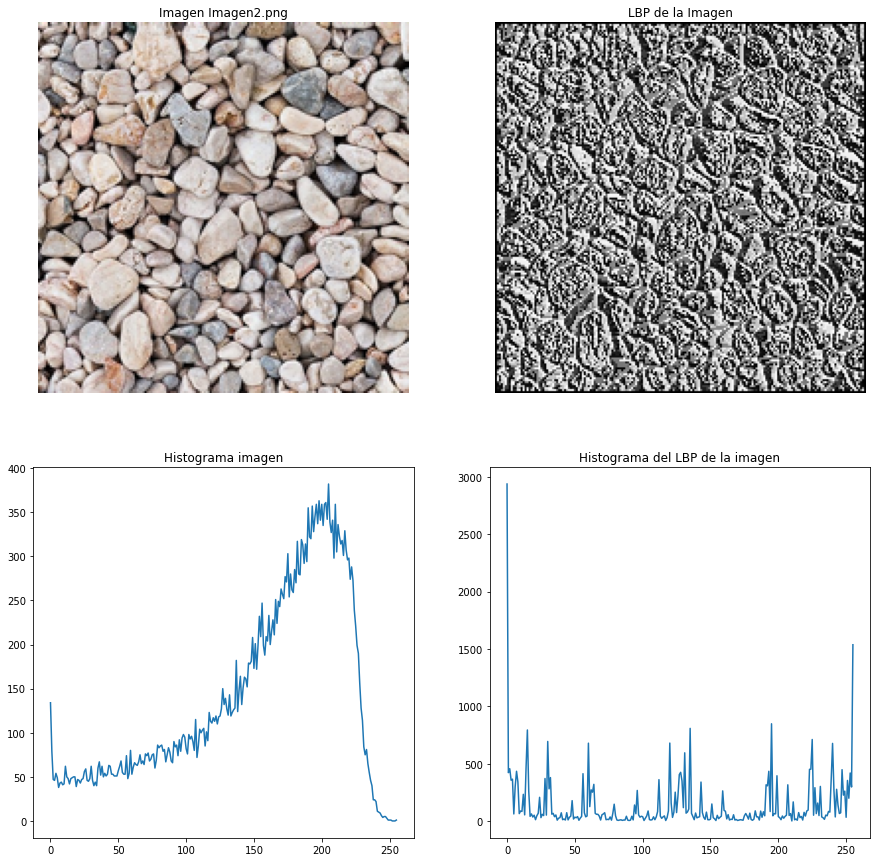

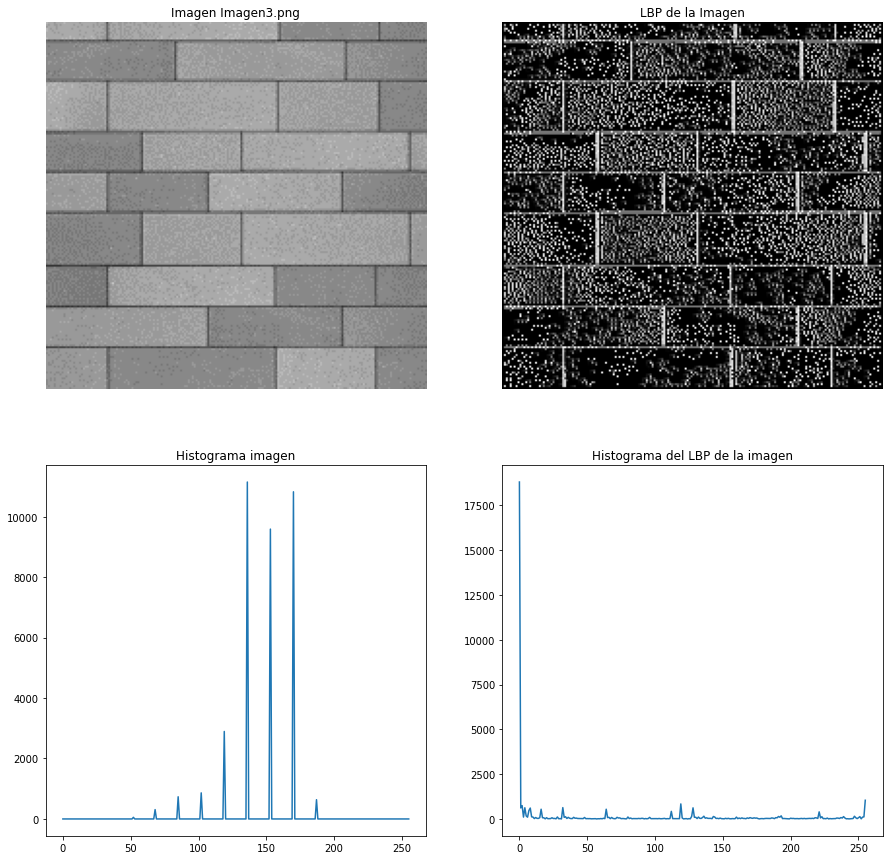

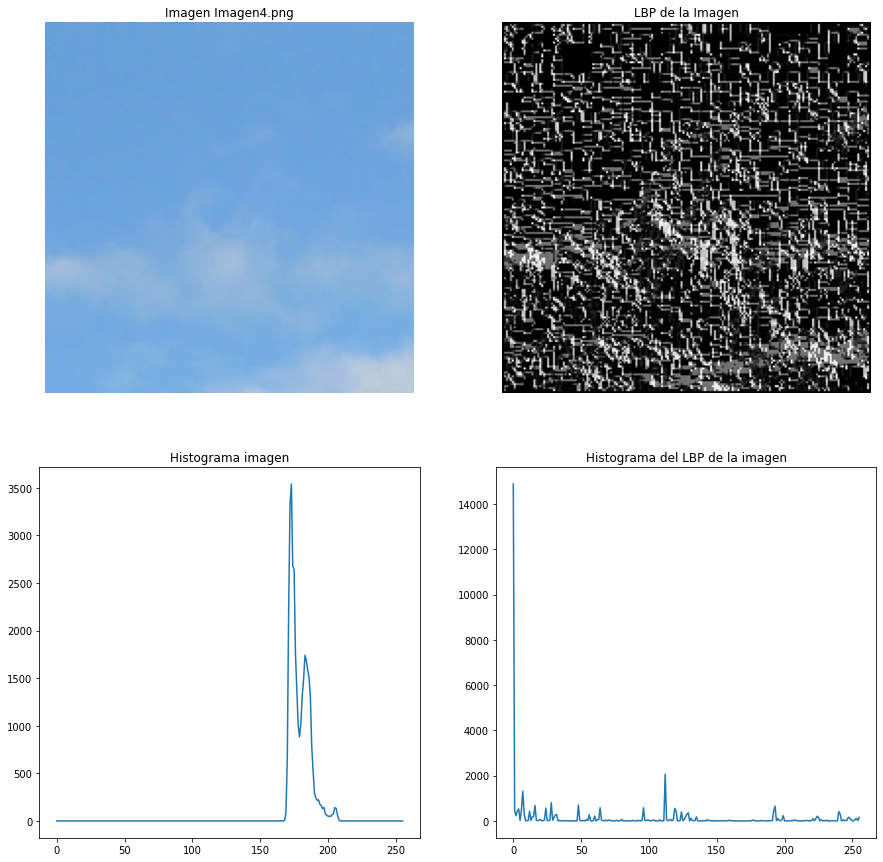

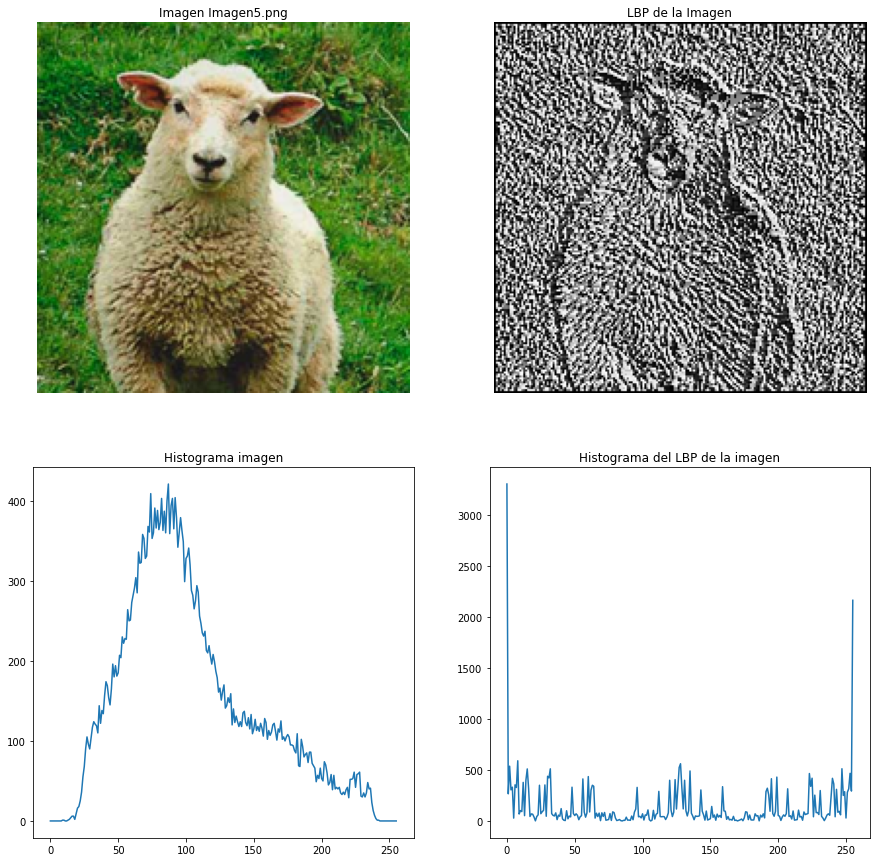

In [239]:
for idx in range (5):
       
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    plt.axis('off')
    plt.title("Imagen "+filenames[idx])
    plt.imshow(images[idx])
    plt.subplot(2,2,2)
    plt.axis('off')
    plt.title("LBP de la Imagen")
    plt.imshow(lbp(gray_images[idx]),cmap='gray')
    
    hist,bins = np.histogram(gray_images[idx].ravel(),256,[0,256])
    hist_lbp,bins1_lbp = np.histogram(lbp(gray_images[idx]).ravel(),256,[0,256])
    
    plt.subplot(2,2,3)
    plt.title("Histograma imagen")
    plt.plot(hist)
    plt.subplot(2,2,4)
    plt.title("Histograma del LBP de la imagen")
    plt.plot(hist_lbp)
    
    plt.show()    
    print("\n") 

#### Punto 3

## Conclusiones y comparaciones de histogramas

* El histograma de las LBP de imágenes con gran contenido de escala de grises o bien, con pocos segmentos con colores distintos (en la imagen de la nube, su histograma se encuentra "poco ecualizado", concentrado en un segmento de la gráfica), se observan picos en las puntas de la gráfica del histograma, con la mayoría de los bins prácticamente en cero.
* Distinto es el caso de las gráficas con mayor cantidad de segmentos con distintos colores. El histograma de los LBPs de las imágenes, tienen mayor cantidad de picos distribuidos a los largo de la gráfica.